In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Data = pd.read_csv('Participantes.csv') #Lendo arquivo

#Limpando repetições e termos grandes
Data.replace('USP ', 'USP', inplace=True)
Data.replace('IAG – Instituto de Astronomia, Geofísica e Ciências Atmosféricas, Universidade de São Paulo ', 'IAG-USP', inplace=True)
Data.replace('UNIFEI ', 'UNIFEI', inplace=True)
Data.replace('IAG – Instituto de Astronomia, Geofísica e Ciências Atmosféricas, Universidade de São Paulo|USP – Universidade de São Paulo ', 'IAG-USP', inplace=True)
Data.replace('IAG-USP ', 'IAG-USP', inplace=True)
Data.replace('0V-UFRJ ', 'OV-UFRJ', inplace=True)
Data.replace('OV-UFRJ ', 'OV-UFRJ', inplace=True)
Data.replace('OV ', 'OV-UFRJ', inplace=True)
Data.replace('CMATFN – Comando do Material de Fuzileiros Navais ', 'CMATFN', inplace=True)
Data.replace('SVMA/UMAPAZ/DPM – Universidade Aberta do Meio Ambiente e Cultura de Paz ', 'SVMA/UMAPAZ/DPM', inplace=True)
Data.replace('NOIRLAB – National Optical-Infrared Astronomy Research Laboratory ', 'NOIRLAB', inplace=True)
Data.replace('IAC-Instituto de Astrofísica de Canarias|UCL – University College London ', 'IAC/UCL', inplace=True)
Data.replace('IFCE – Instituto Federal de Educação, Ciência e Tecnologia do Ceará ', 'IFCE', inplace=True)
Data.replace('AEJA-MACK – Escola Presbiteriana AEJA Mackenzie ', 'AEJA-MACK', inplace=True)
Data.replace('MINERVA – Minerva University ', 'MINERVA', inplace=True)
Data.replace('UP – Universidade do Porto ', 'UP', inplace=True)
Data.replace('CBPF – Centro Brasileiro de Pesquisas Físicas|UFPE – Universidade Federal de Pernambuco ', 'CBPF/UFPE', inplace=True)
Data.replace('UFRGS – Universidade Federal do Rio Grande do Sul ', 'UFRGS', inplace=True)
Data.replace('UFRGS ', 'UFRGS', inplace=True)
Data.replace('CALC – Clube de Astronomia Louis Cruls ', 'CALC', inplace=True)
Data.replace('UEFS – Universidade Estadual de Feira de Santana ', 'UEFS', inplace=True)
Data.replace('IAE – Instituto de Aeronáutica e Espaço ', 'IAE', inplace=True)
Data.replace('UFRG ', 'UFRGS', inplace=True)
Data.replace('IAG ', 'IAG-USP', inplace=True)

In [3]:
Inst = Data['Instituição'].unique()

In [4]:
Quant = []
for i in range(np.size(Inst)):
    Quant.append(np.shape(Data[Data['Instituição']==Inst[i]])[0])

In [5]:
Data2 = pd.DataFrame({'I':Inst,
                     'Q':Quant})

Data2 = Data2.drop(57) #Eliminando '– '
Data2 = Data2.sort_values('Q', ascending=False).reset_index()

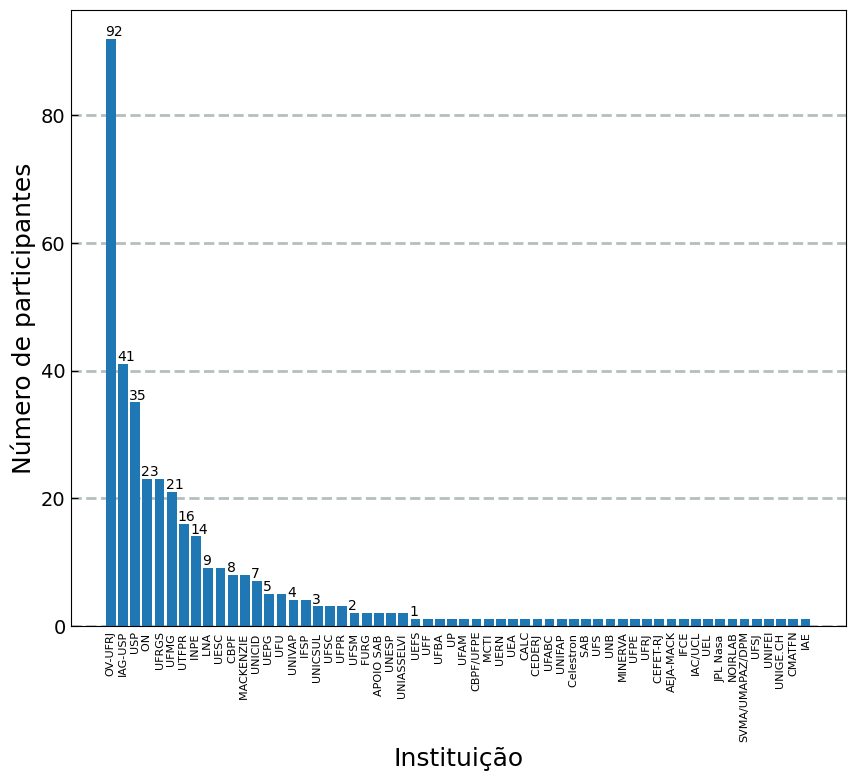

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,8))
#ax.axhline(y=20, color='red')
#ax.axhline(y=40, color='red')
#ax.axhline(y=60, color='red')
#ax.axhline(y=80, color='red')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)


ax.bar(Data2['I'], Data2['Q'],width=0.8, align='center')

Data2_1 = Data2.drop_duplicates('Q')
for i in range(15):
    plt.text(Data2_1.index[i]-0.5, Data2_1['Q'][Data2_1.index[i]]+0.5,
             str(Data2_1['Q'][Data2_1.index[i]]))

ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('none')
ax.tick_params(which='major',length = 5, direction = 'in',labelsize=14)
plt.xticks(fontsize=8, rotation=90)
#ax.tick_params(which='minor',length = 5, direction = 'in',labelsize=14)
ax.set_axisbelow(True)

ax.set_xlabel(r'Instituição', fontsize=18)
ax.set_ylabel(r'Número de participantes', fontsize=18)

fig.savefig('ParticipantesSAB.png', dpi = 400, bbox_inches='tight')